In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn
import seaborn as sns
###


In [ ]:
!pip install ucimlrepo


In [ ]:
### Wisconsin Cancer dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [ ]:
### illustrate dataset
X.head(5)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.value_counts()

Diagnosis
B            357
M            212
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 [Text(0.5, 0, 'radius1'),
  Text(1.5, 0, 'texture1'),
  Text(2.5, 0, 'perimeter1'),
  Text(3.5, 0, 'area1'),
  Text(4.5, 0, 'smoothness1'),
  Text(5.5, 0, 'compactness1'),
  Text(6.5, 0, 'concavity1'),
  Text(7.5, 0, 'concave_points1'),
  Text(8.5, 0, 'symmetry1'),
  Text(9.5, 0, 'fractal_dimension1'),
  Text(10.5, 0, 'radius2'),
  Text(11.5, 0, 'texture2'),
  Text(12.5, 0, 'perimeter2'),
  Text(13.5, 0, 'area2'),
  Text(14.5, 0, 'smoothness2'),
  Text(15.5, 0, 'compactness2'),
  Text(16.5, 0, 'concavity2'),
  Text(17.5, 0, 'concave_points2'),
  Text(18.5, 0, 'symmetry2'),
  Text(19.5, 0, 'fractal_dimension2'),
  Text(20.5, 0, 'radius3'),
  Text(21.5, 0, 'texture3'),
  Text(22.5, 0, 'perimeter3'),
  Text(23.5, 0, 'area3'),
  Text(24.5, 0, 'smoothness3'),
  Text(25.5, 0, 'compactness

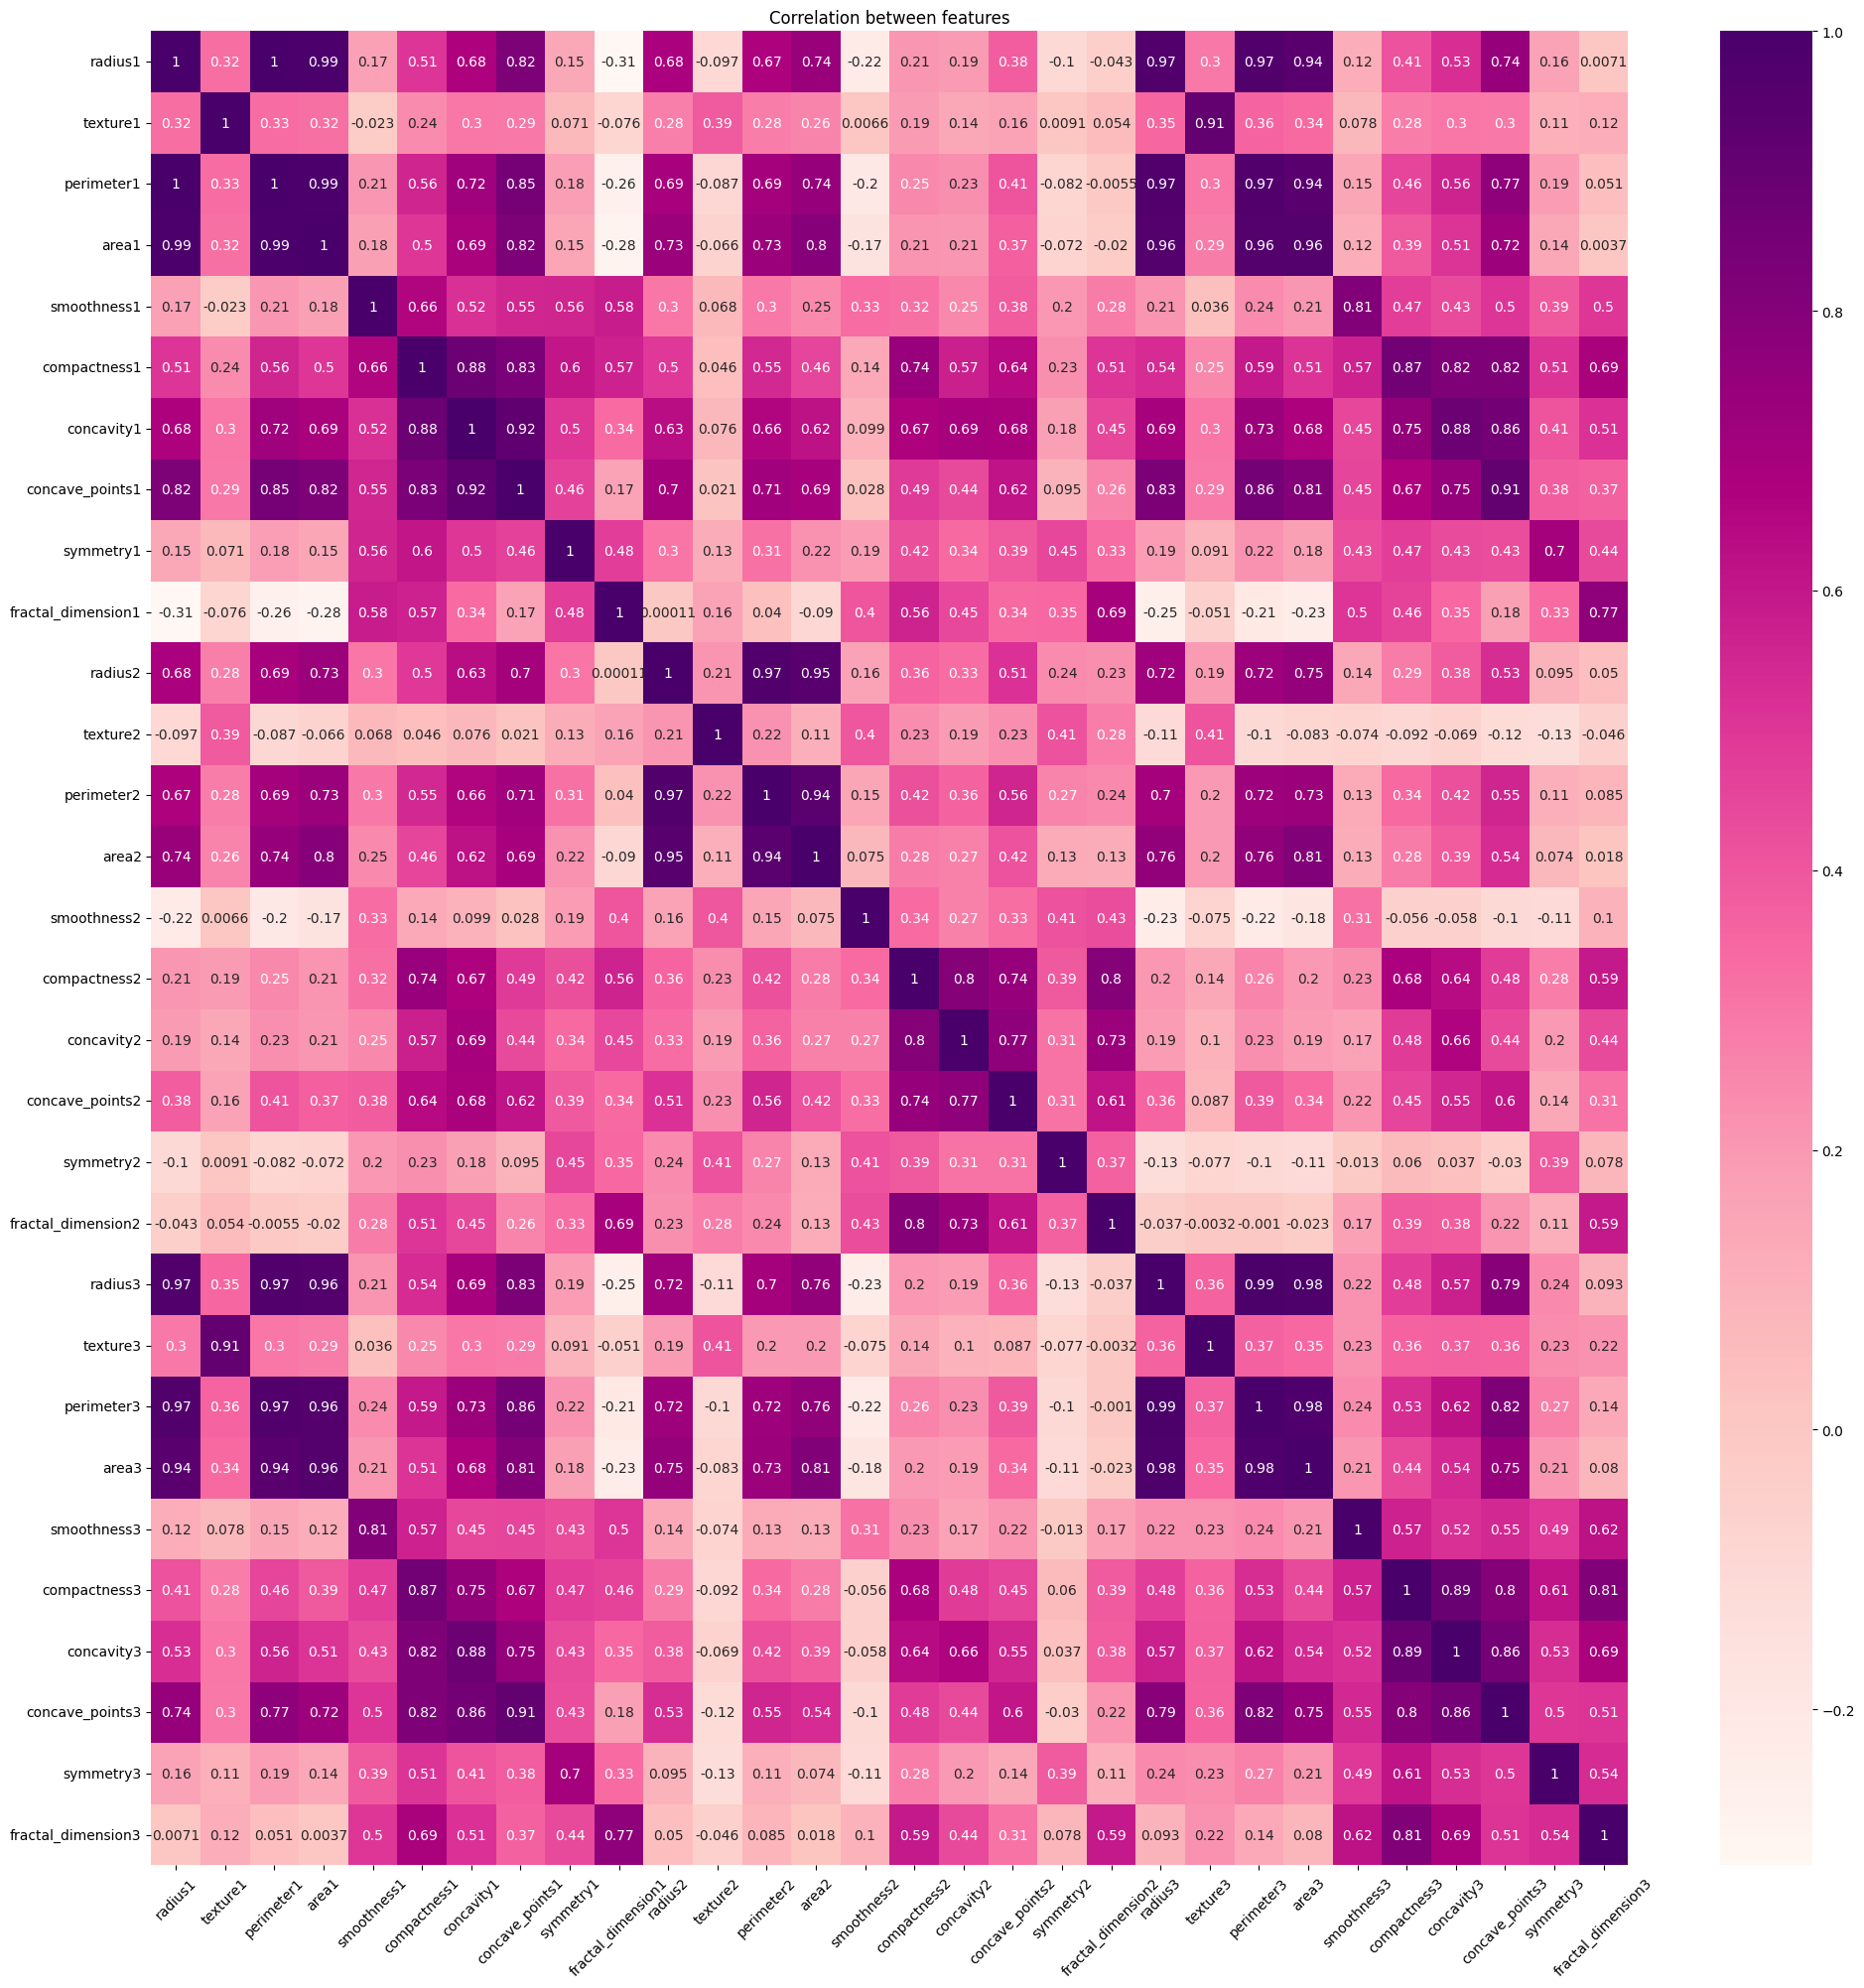

In [ ]:
plt.subplots(figsize=(24,24))
feature_corr=X.corr()
sns.heatmap(feature_corr,annot=True,cmap='RdPu')
plt.title('Correlation between features')
plt.xticks(rotation=45)

In [ ]:
### first scale the dataset and create target M: y=1 ; B: y=0
xdata=X.values
from sklearn.preprocessing import StandardScaler as SS
scaler=SS()
normal_x=scaler.fit_transform(xdata)
ydata=y.values.ravel()

In [ ]:
### def function to calculate precision and recall
def PR_met(conf_mat):
  tn, fp, fn, tp = conf_mat.ravel()
  precision=tp/(tp+fp)
  recall=tp/(tp+fn)
  F1 = 2 * (precision * recall) / (precision + recall)
  return(precision,recall,F1)


The number of eignevector for cumulated 95% variance is :10, stop at eigenvalue: 0.3513108748817332


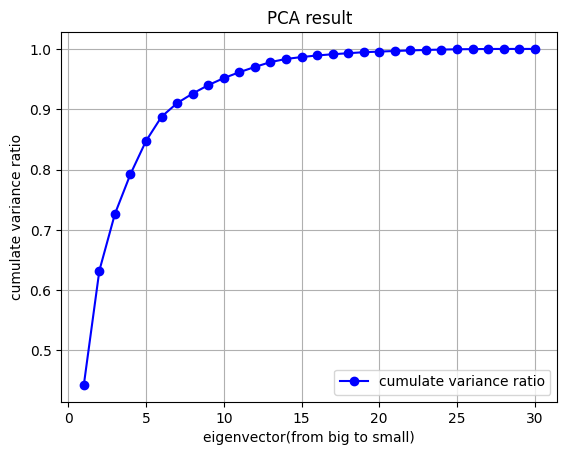

In [ ]:
### first use PCA to select low base feature
from sklearn.decomposition import PCA
p_model=PCA()
p_model.fit(normal_x)
p_model.explained_variance_
variance_c_ratio=np.cumsum(p_model.explained_variance_)/np.sum(p_model.explained_variance_)
for i in range(1,variance_c_ratio.shape[0]):
  if variance_c_ratio[i-1]<=0.95 and variance_c_ratio[i]>0.95:
    use_index=i
    break
##

print(f'The number of eignevector for cumulated 95% variance is :{use_index+1}, stop at eigenvalue: {p_model.explained_variance_[i]}')
plt.plot(np.array([i for i in range(1,p_model.explained_variance_.shape[0]+1)]), variance_c_ratio,'o-b',label='cumulate variance ratio')
plt.xlabel('eigenvector(from big to small)')
plt.ylabel('cumulate variance ratio')
plt.title('PCA result')
plt.legend()
plt.grid()
plt.show()


In [ ]:
### select 10 priciple component
p_n_model=PCA(n_components=10)
new_x=p_n_model.fit_transform(normal_x)
print(f'The new transfer dataset shape:{new_x.shape}')

The new transfer dataset shape:(569, 10)


In [ ]:
### next split the dataset into train and test set, use GridsearchCV to find proper hyper on train(since using CV)
### stratify ydata considering unbalance dataset
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(new_x, ydata, test_size=0.3,random_state=100,stratify=ydata)
print(f'x_train shape:{x_train.shape},x_test shape:{x_test.shape}')
print(f'y_train shape:{y_train.shape},y_test shape:{y_test.shape}')
value_1=np.where(y_train=='B')[0].shape[0]
value_2=np.where(y_train=='M')[0].shape[0]
value_3=np.where(y_test=='B')[0].shape[0]
value_4=np.where(y_test=='M')[0].shape[0]
print(f'train dataset with: {value_1} B, {value_2} M')
print(f'test dataset with: {value_3} B, {value_4} M')

x_train shape:(398, 10),x_test shape:(171, 10)
y_train shape:(398,),y_test shape:(171,)
train dataset with: 250 B, 148 M
test dataset with: 107 B, 64 M


In [ ]:
np.where(y_train=='B')[0].shape[0]

250

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 41))
param_grid = dict(n_neighbors=k_range)
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [ ]:
### print the best n_neightbors based on GridSearchCV
print(grid_search.best_params_)

{'n_neighbors': 5}


In [ ]:
### therefore, we choose n_neightbors=5,weight=unifrom(default),distance metric is p=2

knn_best=KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
print(f'The final training loss:{1-knn_best.fit(x_train,y_train).score(x_train,y_train)},final testing loss:{1-knn_best.fit(x_train,y_train).score(x_test,y_test)}')
print(f'Final training accuracy:{knn_best.fit(x_train,y_train).score(x_train,y_train)},final testing acccuracy:{knn_best.fit(x_train,y_train).score(x_test,y_test)}')


The final training loss:0.027638190954773822,final testing loss:0.011695906432748537
Final training accuracy:0.9723618090452262,final testing acccuracy:0.9883040935672515


In [ ]:
#sum(y_test[y_test=='M']==knn_best.fit(x_train,y_train).predict(x_test)[y_test=='M'])

(array([0.5, 1.5]), [Text(0.5, 0, 'B'), Text(1.5, 0, 'M')])

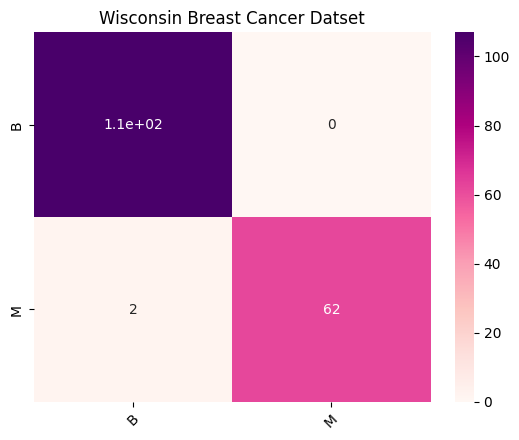

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn_best.fit(x_train,y_train).predict(x_test))
sns.heatmap(mat,annot=True,cmap='RdPu',xticklabels=['B','M'],yticklabels=['B','M'])
plt.title('Wisconsin Breast Cancer Datset')
plt.xticks(rotation=45)

In [ ]:
precision,recall,f1_score=PR_met(mat)
print(f'The precision with PCA is {precision},recall with PCA is {recall},F1_score with PCA is{f1_score}')

The precision with PCA is 1.0,recall with PCA is 0.96875,F1_score with PCA is0.9841269841269841


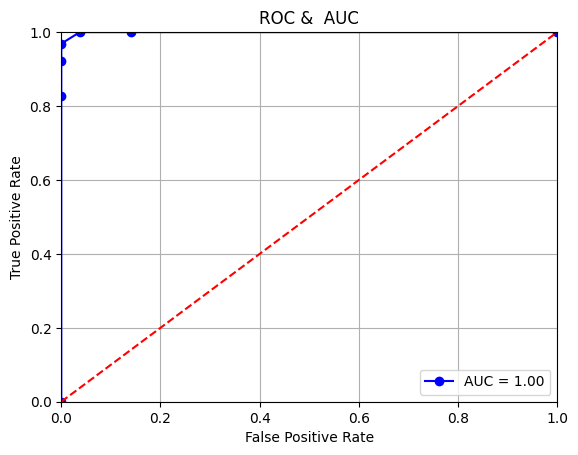

In [ ]:
### auc roc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_turth_test=[]
y_predict_test=[]
predict= knn_best.fit(x_train,y_train).predict(x_test)
for i in range(y_test.shape[0]):
  if y_test[i]=='B':
    y_turth_test.append(0)
  else:
    y_turth_test.append(1)
  if predict[i]=='B':
    y_predict_test.append(0)
  else:
    y_predict_test.append(1)
####
y_scores = knn_best.fit(x_train,y_train).predict_proba(x_test)
fpr, tpr, threshold = roc_curve(np.array(y_turth_test), y_scores[:,1])
roc_auc = sklearn.metrics.auc(fpr, tpr)

plt.title('ROC &  AUC')
plt.plot(fpr, tpr, 'o-b',alpha=1, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()
